
# F.A.I.R. data management in **CRC 1333** *project INF*

## INF03 - SAXS workflow with AnIML

---

> Authors: Selina Itzigehl, Torsten Giess  
> Last modified: 21.12.2021


### **Abstract** <a class="anchor" name="abstract"></a>

lorem ipsum

### **Table of Contents** <a class="anchor" name="table_of_contents"></a>

- [Abstract](#abstract)
- [Introduction](#introduction)
- [Workflow](#workflow)
    - [User guide](#user_guide)
    - [Preparation](#preparation)
    - [Conversion to AnIML](#conversion)
    - [Read from AnIML](#read)
    - [Visualisation](#visualisation)
    - [Analysis](#analysis)
    - [Results](#results)
    - [Write to AnIML](#write)
- [Discussion](#discussion)
- [Outlook](#outlook)
- [Bibliography](#bibliography)

---
### **Introduction** <a class="anchor" name="introduction"></a>

lorem ipsum

---
### **Workflow** <a class="anchor" name="workflow"></a>

#### **User guide** <a class="anchor" name="user_guide"></a>

lorem ipsum

#### **Preparation** <a class="anchor" name="preparation"></a>

lorem ipsum

In [1]:
from lxml import etree
from modules.saxslicer import SAXSlicer
from modules.helperv2 import DataFromAnIML
from modules.helper import Visualisation, Analysis, Results
from pyaniml import AnIMLDocument, Sample, Series, ExperimentStep, Device, IndividualValueSet, SeriesSet

print(f"Imports successful.")

Imports successful.


#### **Conversion to AnIML** <a class="anchor" name="conversion"></a>

lorem ipsum

In [2]:
# Create AnIML document
animl_doc = AnIMLDocument()

# Read & handle calibration file:
calibration_file = SAXSlicer("./datasets/raw/CholPal_210713[7]1.pdh")
calibration_data = calibration_file.extract_data()
calibration_metadata = calibration_file.extract_metadata("./datasets/processed/CholPal_metadata.xml")

calibration_sample = Sample(
    id="calibration",
    name="Cholesteryl palmitate"
)
animl_doc.add_sample(calibration_sample)
calibration_experiment = ExperimentStep(
    name="calibration measurement",
    experiment_step_id="step00"
)
calibration_experiment.add_sample_reference(
    sample=calibration_sample,
    role="measured",
    sample_purpose="destroyed"
)
calibration_device = Device(
    name="Anton Parr SAXSess",
    firmware_version="",
    serial_number=""
)
calibration_experiment.add_method(calibration_device)
calibration_q_values = IndividualValueSet(
    calibration_data["scattering_vector"].tolist()
)
calibration_q = Series(
    name="scattering vector",
    id="cal_q",
    data=calibration_q_values,
    data_type="float32",
    dependency="dependent",
    plot_scale="none"
)
calibration_i_values = IndividualValueSet(
    calibration_data["counts_per_area"].tolist()
)
calibration_i = Series(
    name="counts per area",
    id="cal_i",
    data=calibration_i_values,
    data_type="float32",
    dependency="dependent",
    plot_scale="none"
)
calibration_set = SeriesSet(
    name="1D SAXS",
    series=[calibration_q, calibration_i]
)
calibration_experiment.add_result(calibration_set)
animl_doc.add_experiment_step(calibration_experiment)

# Read & handle actual sample file:
sample_file = SAXSlicer("./datasets/raw/SI06_210623[7].pdh")
sample_data = sample_file.extract_data()
sample_metadata = sample_file.extract_metadata("./datasets/processed/SI06_210623.xml")

sample_sample = Sample(
    id="sample",
    name="SI06_210623"
)
animl_doc.add_sample(sample_sample)
sample_experiment = ExperimentStep(
    name="sample measurement",
    experiment_step_id="step01"
)
sample_experiment.add_sample_reference(
    sample=sample_sample,
    role="measured",
    sample_purpose="destroyed"
)
sample_device = Device(
    name="Anton Parr SAXSess",
    firmware_version="",
    serial_number=""
)
sample_experiment.add_method(sample_device)
sample_q_values = IndividualValueSet(
    sample_data["scattering_vector"].tolist()
)
sample_q = Series(
    name="scattering vector",
    id="sam_q",
    data=sample_q_values,
    data_type="float32",
    dependency="dependent",
    plot_scale="none"
)
sample_i_values = IndividualValueSet(
    sample_data["counts_per_area"].tolist()
)
sample_i = Series(
    name="counts per area",
    id="sam_i",
    data=sample_i_values,
    data_type="float32",
    dependency="dependent",
    plot_scale="none"
)
sample_set = SeriesSet(
    name="1D SAXS",
    series=[sample_q, sample_i]
)
sample_experiment.add_result(sample_set)
animl_doc.add_experiment_step(sample_experiment)

xml_string = animl_doc.toXML()

with open("./datasets/processed/test_experiment.animl", "w") as wf:
    wf.write(xml_string)
print(f"Successfully converted and saved PDH to AnIML.")

#print(xml_string)

Loading metadata from existing file: ./datasets/processed/CholPal_metadata.xml.
Loading metadata from existing file: ./datasets/processed/SI06_210623.xml.
Successfully converted and saved PDH to AnIML.


#### **Read from AnIML** <a class="anchor" name="read"></a>

lorem ipsum

In [8]:
path_to_AnIML_file = "./datasets/processed/test_experiment.animl"
with open(path_to_AnIML_file, "rb") as rbf:
    animl_string = rbf.read()

#print(AnIMLDocument.fromXMLString(animl_string))

test_experiment = etree.fromstring(animl_string)

cal_q, cal_i, sam_q, sam_i = [], [], [], []

"""
mockup:
if exists attribute I look for for every attribute in element:
    pass
else:
    if element has children:

"""
for IndividualValueSets in test_experiment.iter("IndividualValueSet"):
    if IndividualValueSets is not None:
        for f in IndividualValueSets.iter("F"):
            print(f)


# for element in test_experiment[1][0][2][0][0][0].iter("F"):
#     cal_q.append(float(element.text))
# for element in test_experiment[1][0][2][0][1][0].iter("F"):
#     cal_i.append(float(element.text))
# for element in test_experiment[1][1][2][0][0][0].iter("F"):
#     sam_q.append(float(element.text))
# for element in test_experiment[1][1][2][0][1][0].iter("F"):
#     sam_i.append(float(element.text))  

print(f"Successfully read from AnIML.")


datex = DataFromAnIML(cal_q, cal_i, sam_q, sam_i)

calibration_q = datex.process_calibration("q")
calibration_i = datex.process_calibration("i")
calibration_peaks = datex.process_calibration("peaks")

samples_q = datex.process_samples("q")
samples_for_plot = datex.process_samples("plot")

print(f"Successfully created Pandas dataframes")

<Element F at 0x2608d91cc80>
<Element F at 0x260f97b67c0>
<Element F at 0x2608d91c0c0>
<Element F at 0x2608d91cc80>
<Element F at 0x260f97b67c0>
<Element F at 0x2608d91c0c0>
<Element F at 0x2608d91cc80>
<Element F at 0x260f97b67c0>
<Element F at 0x2608d91c0c0>
<Element F at 0x2608d91cc80>
<Element F at 0x260f97b67c0>
<Element F at 0x2608d91c0c0>
<Element F at 0x2608d91cc80>
<Element F at 0x260f97b67c0>
<Element F at 0x2608d91c0c0>
<Element F at 0x2608d91cc80>
<Element F at 0x260f97b67c0>
<Element F at 0x2608d91c0c0>
<Element F at 0x2608d91cc80>
<Element F at 0x260f97b67c0>
<Element F at 0x2608d91c0c0>
<Element F at 0x2608d91cc80>
<Element F at 0x260f97b67c0>
<Element F at 0x2608d91c0c0>
<Element F at 0x2608d91cc80>
<Element F at 0x260f97b67c0>
<Element F at 0x2608d91c0c0>
<Element F at 0x2608d91cc80>
<Element F at 0x260f97b67c0>
<Element F at 0x2608d91c0c0>
<Element F at 0x2608d91cc80>
<Element F at 0x260f97b67c0>
<Element F at 0x2608d91c0c0>
<Element F at 0x2608d91cc80>
<Element F at 

#### **Visualisation** <a class="anchor" name="visualisation"></a>

lorem ipsum

Plot and Lorentz fit successful. Best fit for q: [1.17560174, 2.34572076, 3.51747273].


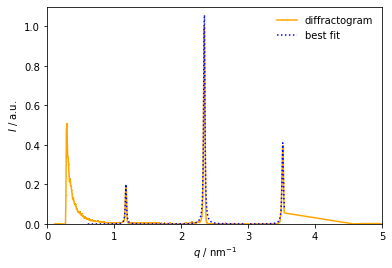

In [4]:
visu = Visualisation(calibration_q, calibration_i, calibration_peaks)

visu.create_plot("orange")
q_cholpal = visu.do_lorentz()

print(f"Plot and Lorentz fit successful. Best fit for q: {q_cholpal}.")

#### **Analysis** <a class="anchor" name="analysis"></a>

lorem ipsum

In [5]:
ana = Analysis(samples_q, samples_for_plot, q_cholpal)

data_evaluation = ana.do_analysis()
    
print(f"Data evaluation successful.")

Data evaluation successful.


#### **Results** <a class="anchor" name="results"></a>

lorem ipsum

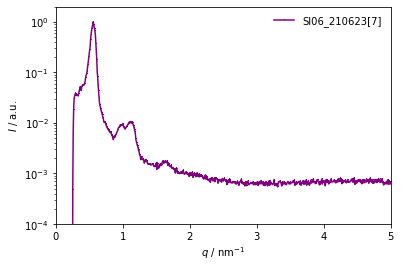

Successfully saved analysis results to .tsv and plots to .png.


In [6]:
path_to_raw_data = "datasets/raw/"
path_to_save = "datasets/processed/"

res = Results(path_to_raw_data, samples_for_plot, data_evaluation, path_to_save)

res.write_to_tsv()
res.plot_and_save_data("purple")

print(f"Successfully saved analysis results to .tsv and plots to .png.")

---
### **Discussion** <a class="anchor" name="discussion"></a>

lorem ipsum

---
### **Outlook** <a class="anchor" name="outlook"></a>

lorem ipsum

---
### **Bibliography** <a class="anchor" name="bibliography"></a>

lorem ipsum

In [ ]:
#test_experiment = AnIMLDocument.fromXMLString(animl_string)
# cal_raw_list = test_experiment.experiment_steps.experiment_steps[0].result.results
# print(cal_raw_list)


#  for element in test_experiment.iter("Series"):  
#     if element.attrib["seriesID"] == "cal_q":
#         for element in test_experiment.iter("IndividualValueSet"):  
#             for subelement in element.iter("F"):
#                 cal_q.append(subelement.text)
#     elif element.attrib["seriesID"] == "cal_i":
#         for element in test_experiment.iter("IndividualValueSet"):  
#             for subelement in element.iter("F"):
#                 cal_i.append(subelement.text)
#     elif element.attrib["seriesID"] == "sam_q":
#         for element in test_experiment.iter("IndividualValueSet"):  
#             for subelement in element.iter("F"):
#                 sam_q.append(subelement.text)
#     elif element.attrib["seriesID"] == "sam_i":
#         for element in test_experiment.iter("IndividualValueSet"):  
#             for subelement in element.iter("F"):
#                 sam_i.append(subelement.text)



"""
datex = DataExtracion(path_to_raw_data, calibration_file)

calibration_q = datex.process_calibration("q")
calibration_i = datex.process_calibration("i")
calibration_peaks = datex.process_calibration("peaks")

samples_q = datex.process_samples("q")
samples_for_plot = datex.process_samples("plot")
"""